# Advanced Numerical Analysis

## Exercise 32

*Write a Matlab program for solving the initial value problem*
$$\begin{cases}
y'' + 101 y' + 100 y = 0 \\
y(0) = 3,\ y'(0) = -102
\end{cases}$$

*after transformation to a system of first order differential equations with*

$\textrm{(i)} \quad$ *Euler’s method,*  
$\textrm{(ii)} \quad$ *the second half step method,*  
$\textrm{(iii)} \quad$ *the third half step method.*

*Use stepsizes* $\frac{1}{8}, \frac{1}{64},$ *and* $\frac{1}{256}$ *and compute until* $t = 3.$ *Compare the results
to the exact solution* $y(t) = 2 e^{−t} + e^{−100t}$ *and explain the findings.*

$$ $$

Written as a system of first order differential equations the given initial value problem is equivalent to
$$\begin{cases}
y'(t) = F(t, y(t)), \quad t\in [0,3] \\
y(0) = (3, -102)^\top
\end{cases}$$
for $y=(y_1,y_2)^\top$ and $F(t, y(t)) = \big(\begin{smallmatrix} 0 & 1 \\ -100 & -101 \end{smallmatrix}\big) y(t).$

Defining all of the given data:

In [1]:
interval = [0, 3];
step_sizes = [1/8, 1/64, 1/256];
y0 = [3; -102];

function y_prime = F(t, y)
    % function of the given ODE
    y_prime = [[0 1];[-100 -101]] * y;
endfunction

function y = exact(t)
    % exact solution of the given ODE
    y = 2*exp(-t) + exp(-100*t);
endfunction

Defining all of the required methods:

In [2]:
function y = Euler_method(F, y0, t)    
    m = length(y0);
    n = length(t);
    y = zeros(m, n);
    y(:,1) = y0;
    
    for k = 1 : n-1
        h = t(k+1) - t(k);
        y(:,k+1) = y(:,k) + h * F(t(k), y(:,k));
    endfor
endfunction

function y = Heun_method(F, y0, t)    
    m = length(y0);
    n = length(t);
    y = zeros(m, n);
    y(:,1) = y0;
    
    for k = 1 : n-1
        h = t(k+1) - t(k);
        x = y(:,k) + h * F(t(k), y(:,k));
        y(:,k+1) = y(:,k) + h/2 * (F(t(k), y(:,k)) + F(t(k+1), x));
    endfor
endfunction

function y = midpoint_rule(F, y0, t, threshold = 1e-8, max_iterations = 1000)   
    m = length(y0);
    n = length(t);
    y = zeros(m, n);
    y(:,1) = y0;
    
    for k = 1 : n-1
        h = t(k+1) - t(k);
        y(:,k+1) = y(:,k);
        
        # fixed point iteration
        for _ = 1 : max_iterations
            x = y(:,k) + h * F(t(k) + h/2, y(:,k) + h/2 * y(:,k+1));
            if all(abs(x - y(:,k+1)) <= threshold)
                break
            endif
            y(:,k+1) = x;
        endfor
    endfor
endfunction

Calculating approximations and errors using the methods from above to all given step sizes:

In [3]:
interval_length = interval(2) - interval(1);
steps = round(interval_length ./ step_sizes) + 1;

for i = 1 : length(steps)
    intervals{i} = linspace(interval(1), interval(2), steps(i));
    exact_vals{i} = exact(intervals{i});
    euler_vals{i} = Euler_method(@F, y0, intervals{i})(1,:);
    heun_vals{i} = Heun_method(@F, y0, intervals{i})(1,:);
    mid_vals{i} = midpoint_rule(@F, y0, intervals{i})(1,:);
    euler_errs(i) = max(abs(exact_vals{i} - euler_vals{i}));
    heun_errs(i) = max(abs(exact_vals{i} - heun_vals{i}));
    mid_errs(i) = max(abs(exact_vals{i} - mid_vals{i}));
endfor

Comparing the modified Euler method with different step sizes:

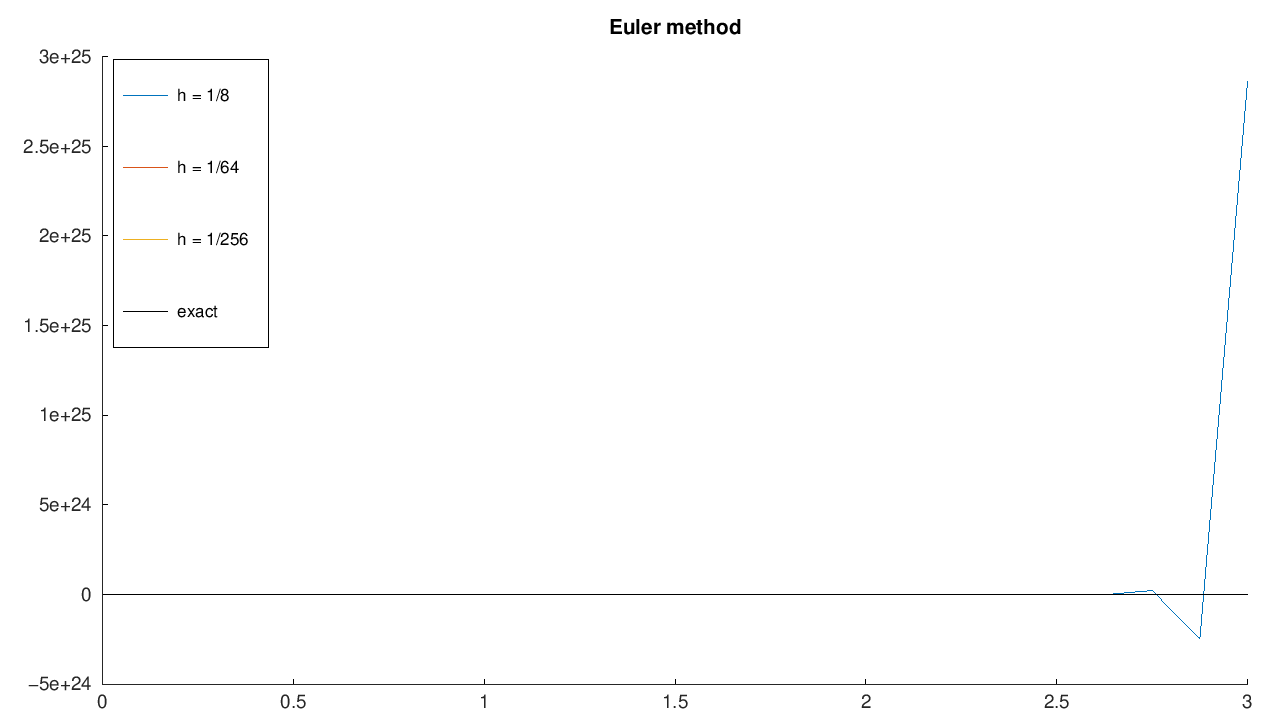

In [6]:
%plot -s 1280,720

hold on;
for i = 1 : length(steps)
    plot(intervals{i}, euler_vals{i}, "displayname", sprintf("h = 1/%d", (steps(i) - 1) / 3));
endfor
plot(intervals{3}, exact_vals{3}, "k", "displayname", "exact");
title("Euler method");
legend("location", "northwest");

Notice that Euler's method oscillates heavily and the error goes to infinty. Heun's method on the other hand overshoots consistently:

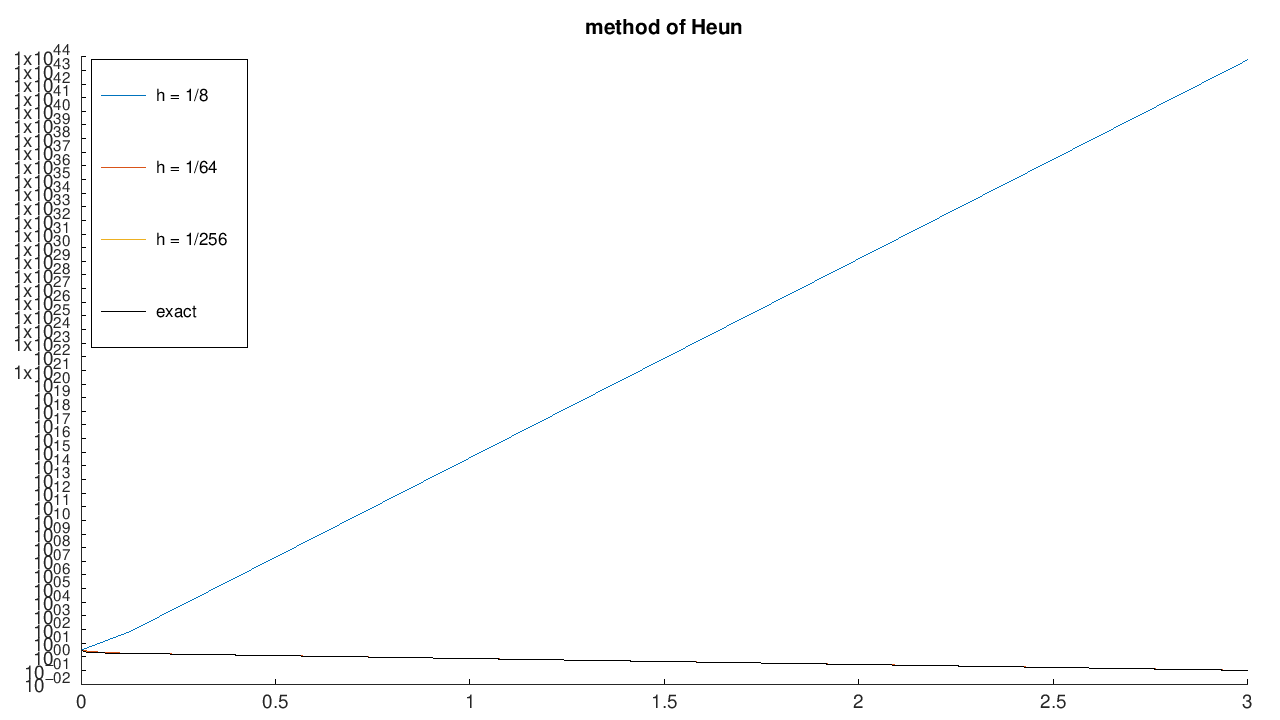

In [7]:
hold on;
for i = 1 : length(steps)
    semilogy(intervals{i}, heun_vals{i}, "DisplayName", sprintf("h = 1/%d", (steps(i) - 1) / 3));
endfor
semilogy(intervals{3}, exact_vals{3}, "k", "DisplayName", "exact");
title("method of Heun");
legend("location", "northwest");

The implicit midpoint rule oscillates similarly to Euler's method:

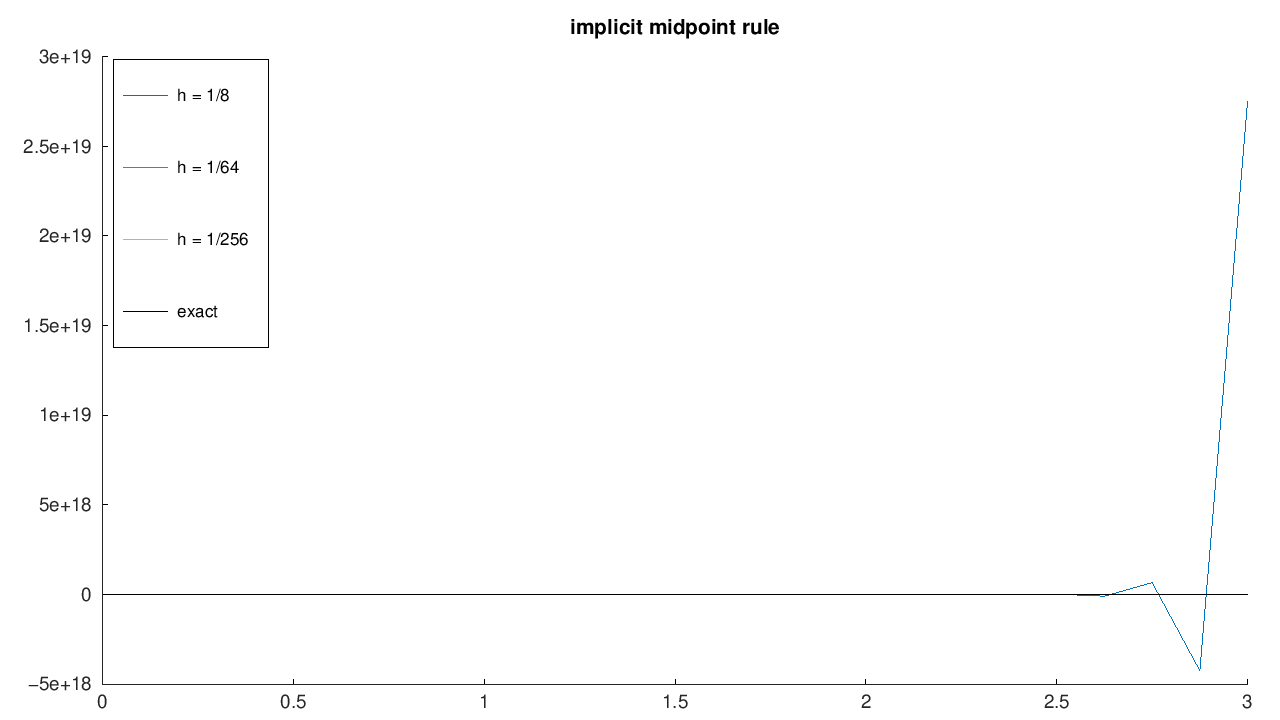

In [8]:
hold on;
for i = 1 : length(steps)
    plot(intervals{i}, mid_vals{i}, "displayname", sprintf("h = 1/%d", (steps(i) - 1) / 3));
endfor
plot(intervals{3}, exact_vals{3}, "k", "displayname", "exact");
title("implicit midpoint rule");
legend("location", "northwest");

Since they all perform very poorly for the smallest step size, we will plot them together only for step sizes of $\frac{1}{64}$ and $\frac{1}{64}$ and zoomed into $t=0:$

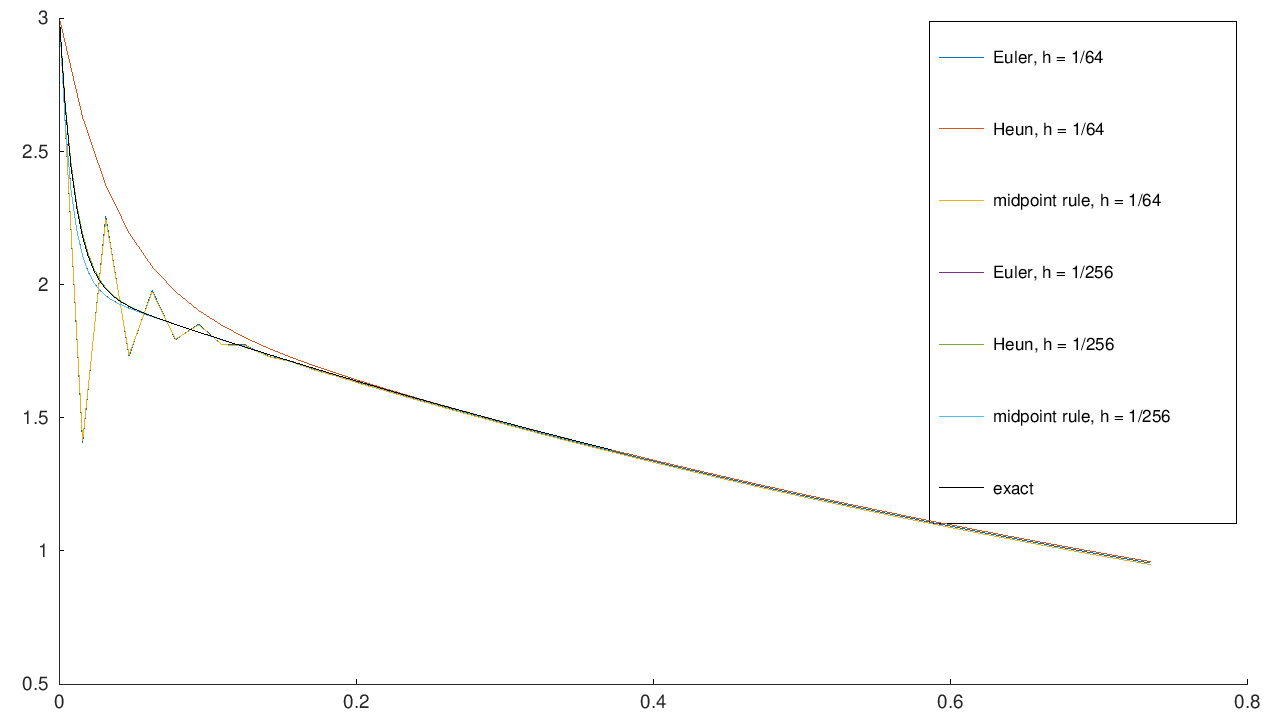

In [26]:
hold on;
for i = 2 : length(steps)
    plot(intervals{i}(1:steps(i)/2^i), euler_vals{i}(1:steps(i)/2^i), "displayname", sprintf("Euler, h = 1/%d", (steps(i) - 1) / 3))
    plot(intervals{i}(1:steps(i)/2^i), heun_vals{i}(1:steps(i)/2^i), "displayname", sprintf("Heun, h = 1/%d", (steps(i) - 1) / 3))
    plot(intervals{i}(1:steps(i)/2^i), mid_vals{i}(1:steps(i)/2^i), "displayname", sprintf("midpoint rule, h = 1/%d", (steps(i) - 1) / 3))
endfor
plot(intervals{3}(1:steps(3)/2^3), exact_vals{3}(1:steps(3)/2^3), "k", "displayname", "exact")
legend();

Here we see that Euler's method and the midpoint rule still oscillate for $h = \frac{1}{64}.$

Maximum error for every method at each step size:

In [18]:
disp("step size | Euler method | Heun method | implicit midpoint rule")

for i = 1 : length(steps)
    printf("    1/%3d | %12.4e | %11.4e | %22.4e\n", (steps(i) - 1) / 3, euler_errs(i), heun_errs(i), mid_errs(i))
endfor

step size | Euler method | Heun method | implicit midpoint rule
    1/  8 |   2.8625e+25 |  5.8519e+43 |             2.7501e+19
    1/ 64 |   7.7235e-01 |  4.4859e-01 |             7.6581e-01
    1/256 |   8.6526e-02 |  1.2576e-02 |             8.7122e-02
